In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout

Using TensorFlow backend.
c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [2]:
import bz2
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_holder_path = "\\lyft_pickled_data_all_clusterAnchor_juncF_centTrotF_coordT_yawF\\"

In [4]:
folder_path = "C:\\Users\\Benson\\Desktop\\Lyft_scripts\\"
template_file_name = "lyft_partitions_{0}_10.pkl"
full_data_holder_path_template = folder_path + data_holder_path + template_file_name

In [5]:
full_partitions_dataset = []

In [6]:
def unpack_file(i, full_data_holder_path_template):
    # make file name
    full_data_holder_path = full_data_holder_path_template.format(str(i))
    print(full_data_holder_path)
    
    # read file
    f = open(full_data_holder_path, 'rb')
    data = pickle.load(f)
    # recall that data is a list of lists of partitions,
    print("finished loading {0}".format(str(i)))
    
    # data is too big to just append directly, we need to iter
    
    temp_partitions_dataset = []
    for j in range(len(data)):
        print("\t unpacking j = {0}".format(j))
        partition_sublist = data[j]
        print("\t partition sublist is len {0}".format(len(partition_sublist)))
        temp_partitions_dataset = temp_partitions_dataset + partition_sublist
    
    return temp_partitions_dataset
    


In [7]:
full_partitions_dataset = []
for i in range(1, 10 + 1):
    temp_partitions_dataset = unpack_file(i, full_data_holder_path_template)
    full_partitions_dataset = full_partitions_dataset + temp_partitions_dataset

C:\Users\Benson\Desktop\Lyft_scripts\\lyft_pickled_data_all_clusterAnchor_juncF_centTrotF_coordT_yawF\lyft_partitions_1_10.pkl
finished loading 1
	 unpacking j = 0
	 partition sublist is len 750
	 unpacking j = 1
	 partition sublist is len 1001
	 unpacking j = 2
	 partition sublist is len 1127
	 unpacking j = 3
	 partition sublist is len 1535
	 unpacking j = 4
	 partition sublist is len 1924
	 unpacking j = 5
	 partition sublist is len 2422
	 unpacking j = 6
	 partition sublist is len 3084
	 unpacking j = 7
	 partition sublist is len 2067
	 unpacking j = 8
	 partition sublist is len 1836
	 unpacking j = 9
	 partition sublist is len 4929
C:\Users\Benson\Desktop\Lyft_scripts\\lyft_pickled_data_all_clusterAnchor_juncF_centTrotF_coordT_yawF\lyft_partitions_2_10.pkl
finished loading 2
	 unpacking j = 0
	 partition sublist is len 1857
	 unpacking j = 1
	 partition sublist is len 2561
	 unpacking j = 2
	 partition sublist is len 2917
	 unpacking j = 3
	 partition sublist is len 1719
	 unpacki

### PARTITIONS CREATED; NOW ONTO TIMES SERIES FORECASTING

In [8]:
TRAIN_PROPORTION = 0.8
TRAIN_PROPORTION_INDEXER = int(len(full_partitions_dataset) * 0.8)

np.random.shuffle(full_partitions_dataset)

X_train = []
y_train = []
X_test = []
y_test = []
for i in range(len(full_partitions_dataset)): # [:TRAIN_PROPORTION_INDEXER]:
    partition = full_partitions_dataset[i]
    if i <= TRAIN_PROPORTION_INDEXER:
        X_train.append(partition.input_array)
        y_train.append(partition.output_row)
    else:
        X_test.append(partition.input_array)
        y_test.append(partition.output_row)        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [9]:
X_train.shape

(175836, 2, 60)

In [10]:
assert not np.isnan(X_train).any()
assert not np.isnan(y_train).any()
assert not np.isnan(X_test).any()
assert not np.isnan(y_test).any()

assert not np.isinf(X_train).any()
assert not np.isinf(y_train).any()
assert not np.isinf(X_test).any()
assert not np.isinf(y_test).any()

In [15]:
n_steps = 2
n_features = (X_train.shape[-1])

CHOSEN_ACTIVATION = "tanh"
retseq = True

LOSS_FUNCTION = "" # loss=tf.keras.losses.cosine_similarity

model = Sequential()

model.add(LSTM(100, 
               activation=CHOSEN_ACTIVATION, 
               return_sequences=True, 
               input_shape=(n_steps, n_features)))

model.add(LSTM(50, activation=CHOSEN_ACTIVATION))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss="mse")


In [24]:
model = Sequential()

model.add(LSTM(100, return_sequences=True,
               activation="tanh",  
               input_shape=(NUM_STEPS, NUM_FEATURES)))

model.add(LSTM(50, activation="tanh"))

model.add(Dense(NUM_FEATURES))

model.compile(optimizer="adam", loss="mse")


history = model.fit(X_train, y_train, epochs=10, verbose=1)

NameError: name 'N_STEPS' is not defined

In [16]:
history = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
175836/175836 [==============================] - 34s 191us/sample - loss: 6.5428
Epoch 2/10
175836/175836 [==============================] - 30s 172us/sample - loss: 2.9754
Epoch 3/10
175836/175836 [==============================] - 32s 182us/sample - loss: 2.3700
Epoch 4/10
175836/175836 [==============================] - 33s 189us/sample - loss: 2.1684
Epoch 5/10
175836/175836 [==============================] - 33s 189us/sample - loss: 2.0738
Epoch 6/10
175836/175836 [==============================] - 33s 186us/sample - loss: 2.0209
Epoch 7/10
175836/175836 [==============================] - 35s 202us/sample - loss: 1.9861
Epoch 8/10
175836/175836 [==============================] - 37s 213us/sample - loss: 1.9617
Epoch 9/10
175836/175836 [==============================] - 36s 204us/sample - loss: 1.9446
Epoch 10/10
175836/175836 [==============================] - 37s 208us/sample - loss: 1.9299


In [17]:
# relu_losses = history.history["loss"]
tanh_losses = history.history["loss"]

relu_losses = [2.884565407866063,
 1.9659721862711441,
 1.9283501418761357,
 1.9102720361532697,
 1.8972495027336795,
 1.889783117746688,
 1.8820887336051046,
 1.875282775160098,
 1.866928933806235,
 1.8620092300188633]

tanh_losses = [6.542827249910235,
 2.975351895666412,
 2.3699637337928934,
 2.1683579267336386,
 2.0738060352363448,
 2.020897895841452,
 1.9860897028277251,
 1.961686025122179,
 1.9446124235246616,
 1.9299041186145065]

Text(0.5, 0, 'Epochs')

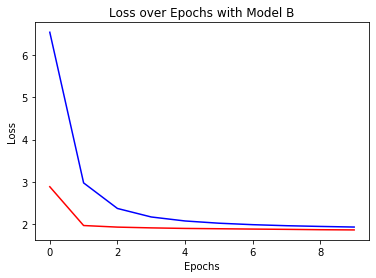

In [23]:
#plt.plot(history.history["loss"])
plt.title("Loss over Epochs with Model B")
plt.plot(tanh_losses, c="blue")
plt.plot(relu_losses, c="red")
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [22]:
results = model.evaluate(X_test, y_test, batch_size=256)
results

43958/43958 [==============================] - 1s 15us/sample - loss: 1.8995


1.8994943793398478

In [23]:
model_predictions = model.predict(X_test)

15678
0.743870908042686


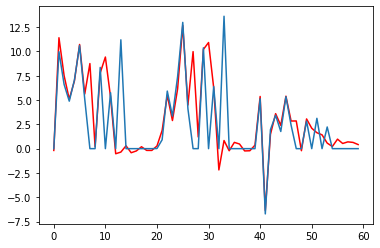

In [33]:
from scipy import spatial

i = np.random.choice(list(range(len(y_test))))
print(i)

x1pred = model_predictions[i]
y1targ = y_test[i]
cosine_similarity = 1 - spatial.distance.cosine(x1pred, y1targ)
print(cosine_similarity)

plt.plot(x1pred, c="red")

plt.plot(y1targ)

In [34]:

len_test = len(y_test)

rand_indices = np.arange(len_test)

np.random.shuffle(rand_indices)

def get_avg_sample_cosinesim(sample_indices):
    avg_cosine_similarity = []
    for ri in sample_indices:
        x1pred = model_predictions[ri]
        y1targ = y_test[ri]
        cosine_similarity = 1 - spatial.distance.cosine(x1pred, y1targ)
        avg_cosine_similarity.append(cosine_similarity)
    return np.mean(avg_cosine_similarity)    

avg_trial_cosinesims = []
for i in range(1000):
    # if (i+1)% 100 == 0:
    #    print(i, 10)
    rand_sample_indices = np.random.choice(rand_indices, 100, replace=True)
    avg_sample_cosinesim = get_avg_sample_cosinesim(rand_sample_indices)
    avg_trial_cosinesims.append(avg_sample_cosinesim)

test_cosine_similarity_accuracy = np.mean(avg_trial_cosinesims)
test_cosine_similarity_accuracy

0.9473089693898123

In [35]:
model.save("Lyft_modelB_relu_alldata.h5")